<a href="https://colab.research.google.com/github/KimStebel/style-transfer-colab/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dependencies to Google Colab Environment

This may take several minutes but needs to only be run once per session. Every Google Colab session has temporary storage for assets such as images and scripts. When the session is closed these objects will be removed but the notebook will remain intact.

1.   neural_style.py
2.   ImageNet


Run the cell below to download necessary dependencies. It also includes a utility function for downloading images.

In [8]:
%tensorflow_version 1.x

#Download neural_style.py
#This code originates from https://github.com/cysmith/neural-style-tf
!wget --output-document=neural_style.py 'https://raw.githubusercontent.com/KimStebel/neural-style-tf/master/neural_style.py'

#Download ImageNet VGG Very Deep
#VGG-VD models from the Very Deep Convolutional Networks for Large-Scale Visual Recognition project.
!wget --output-document=imagenet-vgg-verydeep-19.mat 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat'

import re
import urllib.request

def download_image_from_URL(imageURL):
  imageName = re.search('[a-z0-9\-]+\.(jpe?g|png|gif|bmp)', imageURL, re.IGNORECASE)
  imageName = imageName.group(0)
  urllib.request.urlretrieve(imageURL, imageName)
  imagePath = "./" + imageName
  return imagePath

  

--2021-11-14 16:39:43--  https://raw.githubusercontent.com/KimStebel/neural-style-tf/master/neural_style.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30651 (30K) [text/plain]
Saving to: ‘neural_style.py’

neural_style.py     100%[===================>]  29.93K  --.-KB/s    in 0.001s  

2021-11-14 16:39:43 (23.1 MB/s) - ‘neural_style.py’ saved [30651/30651]

--2021-11-14 16:39:43--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5349047

# Stylize an Image


---- RENDERING SINGLE IMAGE ----


2021-11-14 16:47:39.709667: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-14 16:47:39.713822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-14 16:47:39.714445: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2021-11-14 16:47:39.714796: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-11-14 16:47:39.716585: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-11-14 16:47:39.717519: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Succes

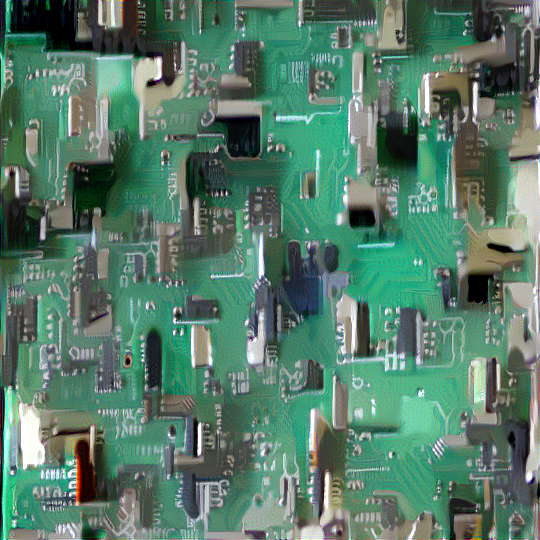

In [17]:
%tensorflow_version 1.x
from IPython.display import Image

! python3 neural_style.py --content_img_dir ./ --style_imgs_dir ./ --img_output_dir ./ --device /gpu:0 --img_name output --init_img_type random --max_iterations 1000 --max_size 540 --content_img ayYiJ.jpg --style_imgs yt-back.png --style_imgs_weights 1 --content_weight 0.0 --style_layer_weights 0.0 0.5 0.5 0.0 0.0 ; # default weights tbd

#    --original_colors \

# Print Final Image
Image('./output/output.png')

In [ ]:
Additional Arguments

--content_img: Filename of the content image. Example: lion.jpg

--content_img_dir: Relative or absolute directory path to the content image. Default: ./image_input

--style_imgs: Filenames of the style images. To use multiple style images, pass a space-separated list. Example: --style_imgs starry-night.jpg

--style_imgs_weights: The blending weights for each style image. Default: 1.0 (assumes only 1 style image)

--style_imgs_dir: Relative or absolute directory path to the style images. Default: ./styles

--init_img_type: Image used to initialize the network. Choices: content, random, style. Default: content

--max_size: Maximum width or height of the input images. Default: 512

--content_weight: Weight for the content loss function. Default: 5e0

--style_weight: Weight for the style loss function. Default: 1e4

--tv_weight: Weight for the total variational loss function. Default: 1e-3

--temporal_weight: Weight for the temporal loss function. Default: 2e2

--content_layers: Space-separated VGG-19 layer names used for the content image. Default: conv4_2

--style_layers: Space-separated VGG-19 layer names used for the style image. Default: relu1_1 relu2_1 relu3_1 relu4_1 
relu5_1

--content_layer_weights: Space-separated weights of each content layer to the content loss. Default: 1.0

--style_layer_weights: Space-separated weights of each style layer to loss. Default: 0.2 0.2 0.2 0.2 0.2

--original_colors: Boolean flag indicating if the style is transferred but not the colors.

--color_convert_type: Color spaces (YUV, YCrCb, CIE L*u*v*, CIE L*a*b*) for luminance-matching conversion to original colors. Choices: yuv, ycrcb, luv, lab. Default: yuv

--style_mask: Boolean flag indicating if style is transferred to masked regions.

--style_mask_imgs: Filenames of the style mask images (example: face_mask.png). To use multiple style mask images, pass a space-separated list. Example: --style_mask_imgs face_mask.png face_mask_inv.png

--noise_ratio: Interpolation value between the content image and noise image if network is initialized with random. Default: 1.0

--seed: Seed for the random number generator. Default: 0

--model_weights: Weights and biases of the VGG-19 network. Download here. Default:imagenet-vgg-verydeep-19.mat

--pooling_type: Type of pooling in convolutional neural network. Choices: avg, max. Default: avg

--device: GPU or CPU device. GPU mode highly recommended but requires NVIDIA CUDA. Choices: /gpu:0 /cpu:0. Default: /gpu:0

--img_output_dir: Directory to write output to. Default: ./image_output

--img_name: Filename of the output image. Default: result

--verbose: Boolean flag indicating if statements should be printed to the console.
Optimization Arguments

--optimizer: Loss minimization optimizer. L-BFGS gives better results. Adam uses less memory. Choices: lbfgs, adam. Default: lbfgs

--learning_rate: Learning-rate parameter for the Adam optimizer. Default: 1e0
